<Figure size 1280x800 with 0 Axes>

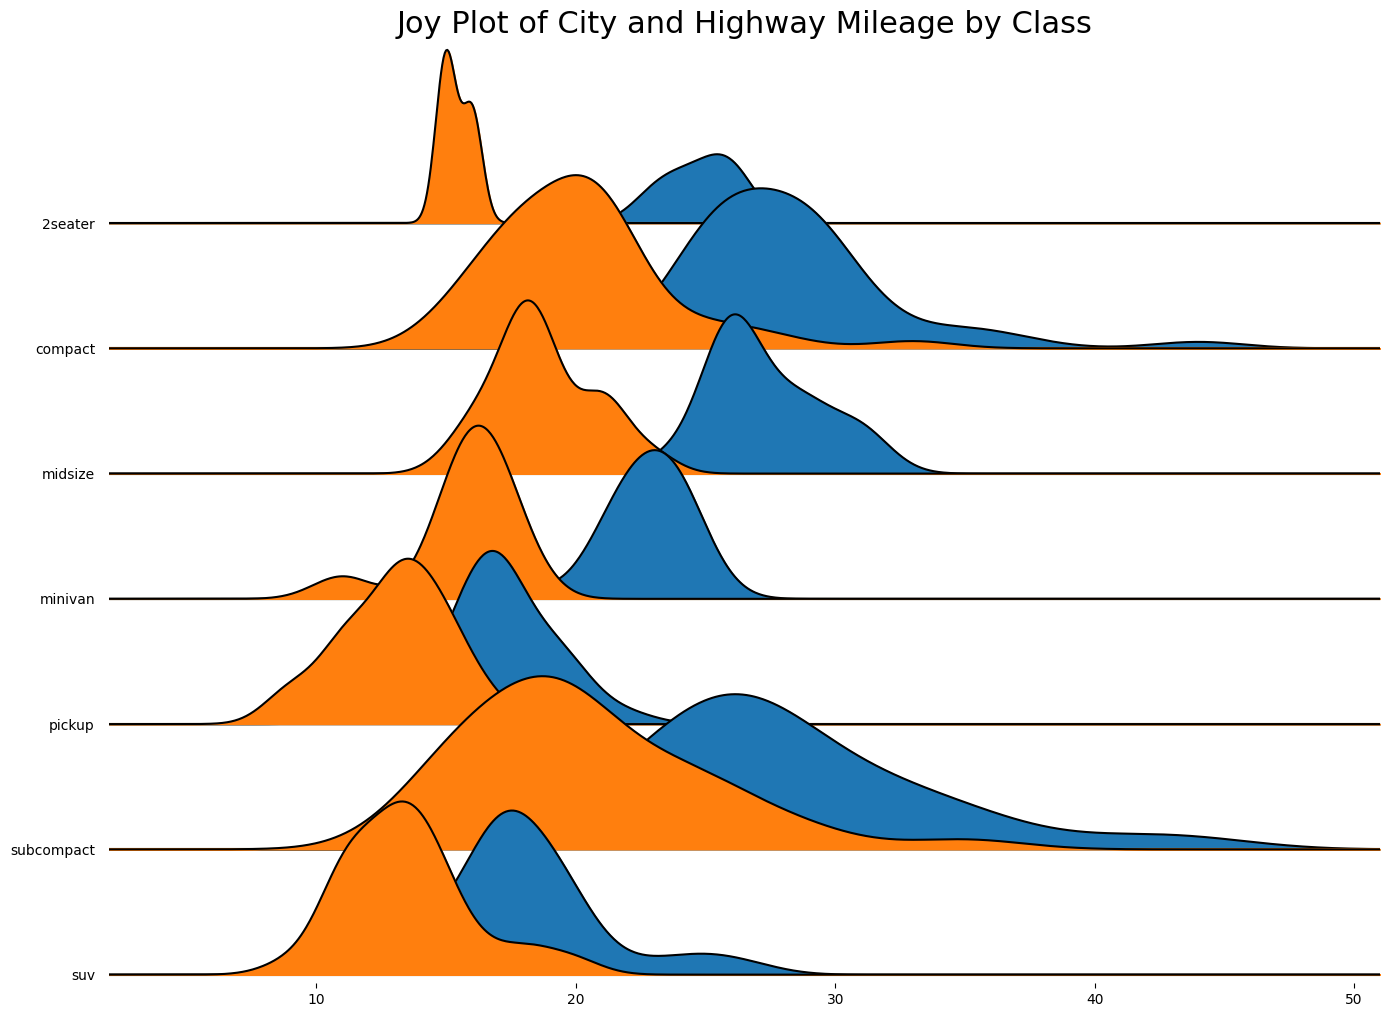

In [1]:
import joypy
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")



# Draw Plot

plt.figure(figsize=(16,10), dpi= 80)

fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))



# Decoration

plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)

plt.show()

In [2]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [3]:
from data_processing.preprocess import KaggleDataset, KaggleDatasetWithQuestion
import json
from sklearn.manifold import TSNE
kaggle_with_question = KaggleDatasetWithQuestion("data/kaggleWithQuestion.csv")
data = kaggle_with_question.poster_data
import numpy as np
import pandas as pd

In [4]:
for i in range(len(data)):
    num = 0
    for p in data[i]['posts']:
        if p.strip() == '':
            continue
        num += 1
    print(str(i) + '\t' + str(num) + '\t' + data[i]['label3'])
    
# 0 - I
# 1 - E

# I - 4, 5, 7
# E - 3, 6, 9
# N - 3, 6, 8
# S - 4, 5, 7
# T - 3, 4, 6
# F - 5, 7, 8
# J - 3, 5, 6
# P - 4, 7, 20

0	34	0
1	53	0
2	44	0
3	50	0
4	50	1
5	50	0
6	50	0
7	50	1
8	50	0
9	50	0
10	50	0
11	40	0
12	50	0
13	50	0
14	50	0
15	49	0
16	50	0
17	49	0
18	50	0
19	50	0
20	48	1
21	50	0
22	50	0
23	34	1
24	50	0
25	50	1
26	50	0
27	50	0
28	50	1
29	49	1
30	47	0
31	50	0
32	50	1
33	50	1
34	50	1
35	50	0
36	50	0
37	49	0
38	47	1
39	49	0
40	49	1
41	21	0
42	50	0
43	50	1
44	44	0
45	50	0
46	50	0
47	44	0
48	37	0
49	50	1
50	50	0
51	49	0
52	45	1
53	50	0
54	50	0
55	50	0
56	42	0
57	48	0
58	49	0
59	50	1
60	48	0
61	50	0
62	28	0
63	37	0
64	50	0
65	48	0
66	49	0
67	27	1
68	42	1
69	50	0
70	46	0
71	50	0
72	50	1
73	48	1
74	50	1
75	50	0
76	50	0
77	48	1
78	49	0
79	50	0
80	50	1
81	49	0
82	50	1
83	50	0
84	50	1
85	50	0
86	50	0
87	48	1
88	43	0
89	50	1
90	50	0
91	50	0
92	38	0
93	50	0
94	50	1
95	50	1
96	55	0
97	50	0
98	52	1
99	50	1
100	49	1
101	50	1
102	50	0
103	27	0
104	50	1
105	48	1
106	45	0
107	50	1
108	50	0
109	50	1
110	50	1
111	50	1
112	38	1
113	50	0
114	50	0
115	50	0
116	50	1
117	50	0
118	45	1
119	50	1
120	50	0
121	50	0
122	40	0
123

In [5]:
tsne = TSNE(n_components=1, perplexity=30)
# I - 4, 5, 7
# E - 3, 6, 9
# N - 3, 6, 8
# S - 4, 5, 7
# T - 3, 4, 6
# F - 5, 7, 8
# J - 3, 5, 6
# P - 4, 7, 25
i_data = [4, 5, 7]
e_data = [3, 6, 9]
n_data = [3, 6, 8]
s_data = [4, 5, 7]
t_data = [3, 4, 6]
f_data = [5, 7, 8]
j_data = [3, 5, 6]
p_data = [4, 7, 25]
embeddings = []
datas = [i_data, e_data, n_data, s_data, t_data, f_data, j_data, p_data]
for data in datas:
    embedding = []
    for j in data:
        with open(f"/home/wenkail/anlp_final/src/data/embedding/embedding{j}.json", "r") as file:
            content = json.load(file)
        embedding.extend(content['pair_embeddings'])
    embedding = np.array(embedding)
    embedding = tsne.fit_transform(embedding)
    # print(embedding.shape)
    embeddings.append(embedding)
len(embeddings)
# for i in i_data:
#     with open(f"/home/wenkail/anlp_final/src/data/embedding/embedding{i}.json", "r") as file:
#         data0 = json.load(file)
#     embedding0.extend(data0['pair_embeddings'])
# for i in e_data:
#     with open(f"/home/wenkail/anlp_final/src/data/embedding/embedding{i}.json", "r") as file:
#         data1 = json.load(file)
#     embedding1.extend(data1['pair_embeddings'])

8

In [6]:
embedding0 = embeddings[::2]
embedding1 = embeddings[1::2]

In [7]:
# single_types = ['I', 'E', 'N', 'S', 'T', 'F', 'J', 'P']
types = ['I/E', 'N/S', 'T/F', 'J/P']
type_list = []
single_type_list = []
for type in types:
    type_list.extend([type for _ in range(150)])
# for single_type in single_types:
#     single_type_list.extend([single_type for _ in range(150)])

In [8]:
type_frame = pd.DataFrame({"embedding0": np.array(embedding0).flatten(), "embedding1": np.array(embedding1).flatten(), "types": type_list})
type_frame.head(151)

,embedding0,embedding1,types
0,-1.236161,2.503896,I/E
1,0.064548,1.922539,I/E
2,-2.640081,1.824427,I/E
3,-0.601768,2.372755,I/E
4,-0.478031,1.190259,I/E
...,...,...,...
146,-2.422540,2.326921,I/E
147,-2.084980,2.337750,I/E
148,-2.815285,4.347073,I/E
149,-2.080215,0.983174,I/E


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

<Figure size 1280x800 with 0 Axes>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

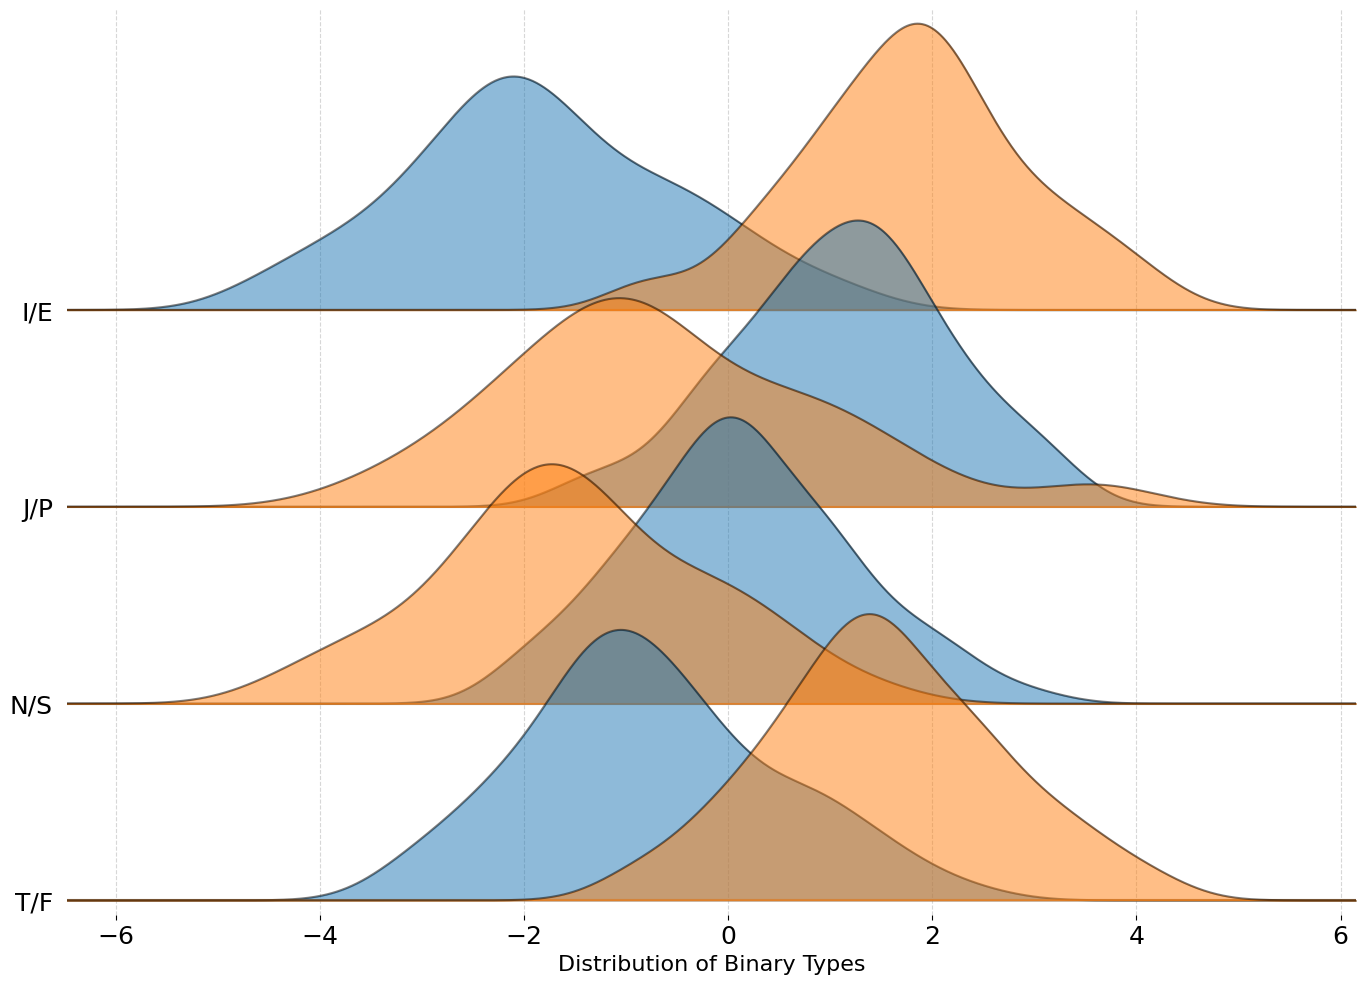

In [23]:
import joypy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.font_manager import FontProperties

# Import Data
# Assuming 'type_frame' is your DataFrame and it's already loaded.
# plt.rcParams['font.family'] = 'Times New Roman'
font_path = 'tnr.ttf'
times_new_roman = FontProperties(fname=font_path)

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(
    type_frame,
    column=['embedding0', 'embedding1'],
    by="types",
    ylim='own',  # 'own' for individual y-axes
    figsize=(14,10),
    alpha=0.5,
      # Example color palette
)

# Decoration
# plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.rc("font", size=18)


# Axes Labels
plt.xlabel('Distribution of Binary Types', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel('Vehicle Class', fontdict={'family' : 'Times New Roman', 'size'   : 16})

# Grid
plt.grid(linestyle='--', alpha=0.5)

# Show Plot
# plt.show()
plt.savefig("distribution_plot.pdf", dpi=800)

In [24]:
store_df = type_frame

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

<Figure size 1280x800 with 0 Axes>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

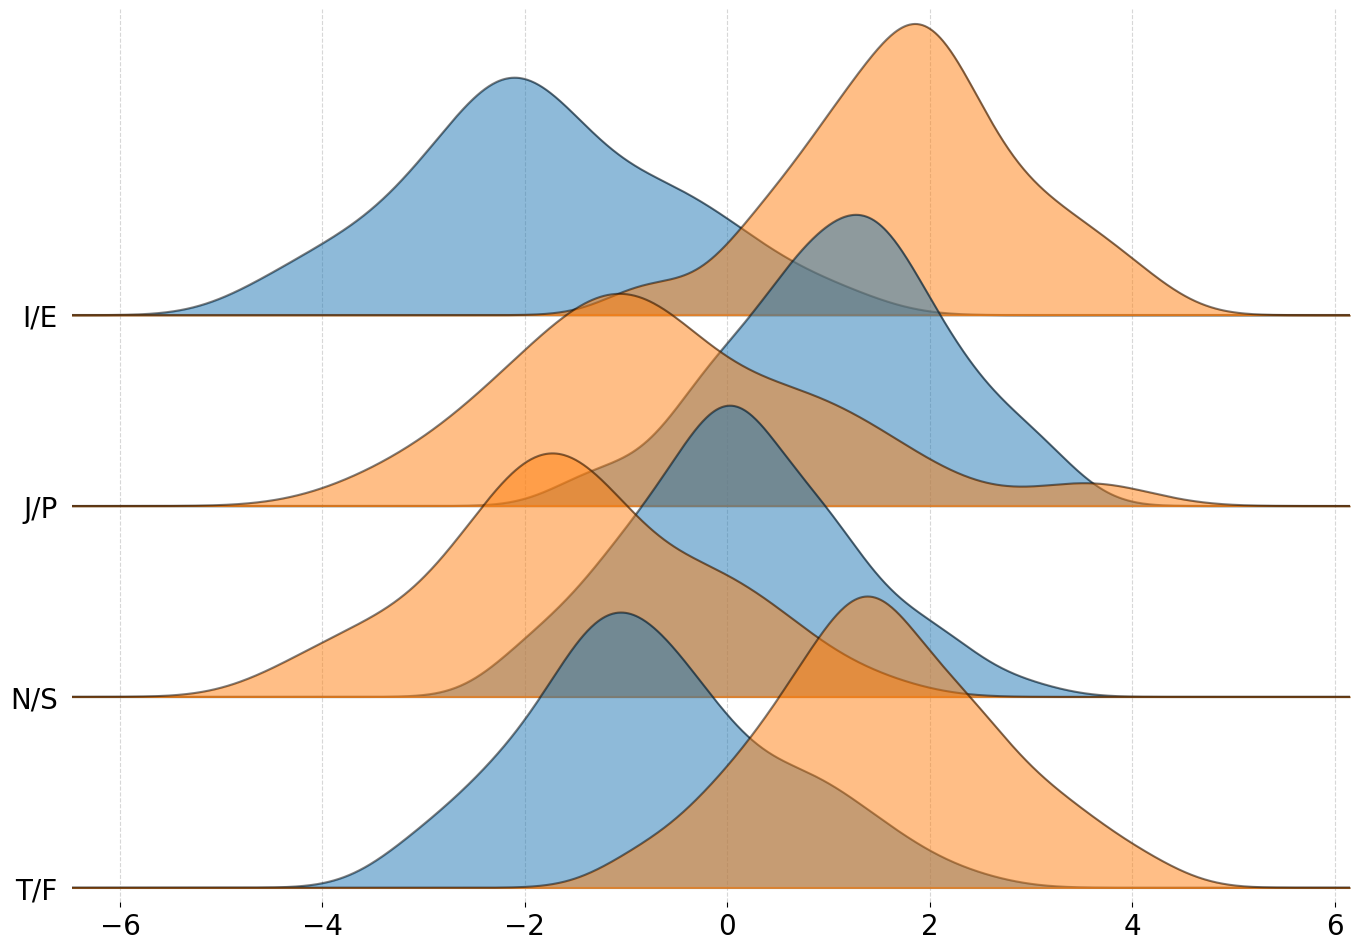

In [32]:
import joypy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.font_manager import FontProperties

# Import Data
# Assuming 'type_frame' is your DataFrame and it's already loaded.
# plt.rcParams['font.family'] = 'Times New Roman'
# font_path = 'tnr.ttf'
# times_new_roman = FontProperties(fname=font_path)

# plt.rc('font',)

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(
    type_frame,
    column=['embedding0', 'embedding1'],
    by="types",
    ylim='own',  # 'own' for individual y-axes
    figsize=(14,10),
    alpha=0.5,
      # Example color palette
)

# Decoration
# plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.rc("font", size=20, family='Times New Roman')


# Axes Labels
# plt.xlabel('Distribution of Binary Types')
plt.ylabel('Vehicle Class')

# Grid
plt.grid(linestyle='--', alpha=0.5)

# Show Plot
# plt.show()
plt.savefig("distribution_plot.pdf", dpi=800)